In [1]:
!pip install pandas
!pip install numpy


In [2]:
!pip3 install sklearn

  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=b33df54a667e5f1ab5026ac604ce36196d314778bf054da85431e0e7feb46c8a
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [103]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df= pd.read_csv('/Users/DELL/Downloads/Salary_dataset.csv')

In [97]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [98]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [99]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
None


In [100]:
df['YearsExperience']

0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64

In [101]:
df1=pd.DataFrame(df, columns = ['YearsExperience','Salary'])

In [102]:
df1

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [120]:
X = df1.drop('Salary',axis=1)
y = df1['Salary']

In [121]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

Text(0, 0.5, 'Salary')

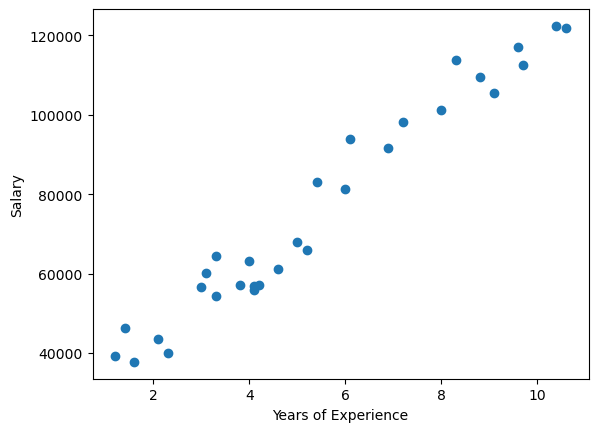

In [116]:
plt.scatter(X,y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')


In [122]:
X.shape , y.shape

((30, 1), (30,))

In [126]:

# from sklearn.linear_model import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 5)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [127]:
# x.values.reshape(1,-1)
# y.values.reshape(-1,1)
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.9569566641435086

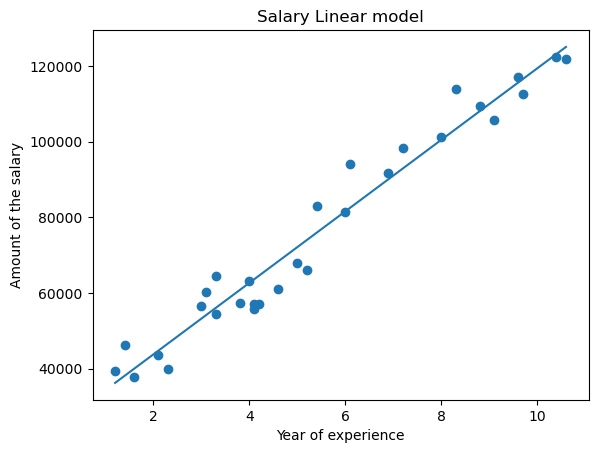

In [128]:
plt.title('Salary Linear model')
plt.xlabel('Year of experience')
plt.ylabel('Amount of the salary')
plt.scatter(df1.YearsExperience, df1.Salary)
plt.plot(df1.YearsExperience, reg.predict(df1[['YearsExperience']]))

In [129]:
reg.coef_

array([9449.96232146])

In [130]:
reg.intercept_

24848.203966523208

In [131]:
y_prediction = reg.predict(x_test)
y_prediction

array([ 63593.04948449, 125017.80457395, 103282.8912346 , 110842.86109176,
        81547.97789525,  62648.05325234])

In [132]:
from sklearn.metrics import r2_score
performance = r2_score(y_test, y_prediction)*100
performance


94.46521057088898